In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
d = df.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1)
d.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
d['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [10]:
dd=pd.get_dummies(d,drop_first= True)
dd

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


In [11]:
dd['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

<Axes: xlabel='Exited', ylabel='count'>

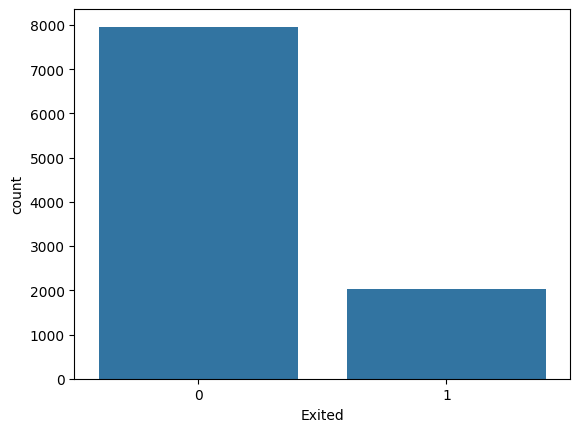

In [12]:
sns.countplot(x='Exited',data=dd)

In [13]:
X=dd.drop('Exited',axis=1)
y = dd['Exited']
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [14]:
#Handling imbalanced data with SMOTE

In [15]:
from imblearn.over_sampling import SMOTE

In [16]:
X_res,y_res = SMOTE().fit_resample(X,y)

In [17]:
y_res.value_counts()

Exited
1    7963
0    7963
Name: count, dtype: int64

In [18]:
#Splitting the dataset into the training set and test set

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size=0.20,random_state=42)

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
sc = StandardScaler()

In [23]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [24]:
X_train

array([[-0.05763819, -0.79919533, -0.66408053, ..., -0.75788816,
         1.57116336, -1.23826767],
       [ 1.0966128 ,  0.10655569, -1.40082333, ..., -0.75788816,
        -0.63647105,  0.80757984],
       [-0.34075636,  0.00591669, -1.03245193, ...,  1.31945589,
        -0.63647105,  0.80757984],
       ...,
       [ 0.20370166,  0.20719469,  1.17777647, ..., -0.75788816,
        -0.63647105,  0.80757984],
       [ 0.20370166,  0.10655569,  0.80940507, ..., -0.75788816,
         1.57116336,  0.80757984],
       [ 0.53037647,  1.01230671, -1.40082333, ...,  1.31945589,
        -0.63647105,  0.80757984]])

In [25]:
#logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
log = LogisticRegression()

In [28]:
log.fit(X_train,y_train)

LogisticRegression()

In [29]:
y_pred1 = log.predict(X_test)

In [30]:
from sklearn.metrics import accuracy_score

In [31]:
accuracy_score(y_test,y_pred1)

0.7799748901443817

In [32]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [80]:
precision_score(y_test,y_pred1)

0.7679245283018868

In [34]:
precision_score(y_test,y_pred1)

0.7679245283018868

In [35]:
recall_score(y_test,y_pred1)

0.7862202189311011

In [36]:
recall_score(y_test,y_pred1)

0.7862202189311011

In [37]:
f1_score(y_test,y_pred1)

0.7769646834234808

In [38]:
f1_score(y_test,y_pred1)

0.7769646834234808

In [39]:
#SVC

In [40]:
from sklearn import svm

In [41]:
svm = svm.SVC()

In [42]:
svm.fit(X_train,y_train)

SVC()

In [43]:
y_pred2 = svm.predict(X_test)

In [44]:
accuracy_score(y_test,y_pred2)

0.8449466415568111

In [81]:
precision_score(y_test,y_pred2)

0.8405144694533762

In [46]:
recall_score(y_test,y_pred2)

0.8415969092079846

In [47]:
f1_score(y_test,y_pred2)

0.8410553410553411

In [48]:
#KNeighbours classifier

In [49]:
from sklearn.neighbors import KNeighborsClassifier

In [50]:
knn = KNeighborsClassifier()

In [51]:
 knn.fit(X_train,y_train)

KNeighborsClassifier()

In [52]:
y_pred3 = knn.predict(X_test)

In [53]:
accuracy_score(y_test,y_pred3)

0.8207784055241683

In [82]:
precision_score(y_test,y_pred3)

0.8008578431372549

In [55]:
recall_score(y_test,y_pred3)

0.8415969092079846

In [56]:
f1_score(y_test,y_pred3)

0.8207221350078493

In [57]:
#Decision tree classifier

In [58]:
from sklearn.tree import DecisionTreeClassifier

In [59]:
dt = DecisionTreeClassifier()

In [60]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [61]:
y_pred4 = dt.predict(X_test)

In [63]:
accuracy_score(y_test,y_pred4)

0.795668549905838

In [64]:
precision_score(y_test,y_pred4)

0.7801242236024845

In [95]:
recall_score(y_test,y_pred4)

0.8274307791371539

In [96]:
f1_score(y_test,y_pred4)

0.8200382897255903

In [ ]:
#Random Forest Classifier

In [65]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
rf = RandomForestClassifier()

In [67]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [68]:
y_pred5 = rf.predict(X_test)

In [69]:
accuracy_score(y_test,y_pred5)

0.8741368487131199

In [86]:
precision_score(y_test,y_pred5)

0.8687580025608195

In [105]:
recall_score(y_test,y_pred5)

0.8274307791371539

In [106]:
f1_score(y_test,y_pred5)

0.8200382897255903

In [ ]:
#Gradient Boosting Classifier

In [70]:
from sklearn.ensemble import GradientBoostingClassifier

In [71]:
gbc = GradientBoostingClassifier()

In [72]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [73]:
y_pred6 = gbc.predict(X_test)

In [74]:
accuracy_score(y_test,y_pred6)

0.8458882611424984

In [84]:
precision_score(y_test,y_pred6)

0.8416988416988417

In [117]:
recall_score(y_test,y_pred6)

0.8274307791371539

In [118]:
f1_score(y_test,y_pred6)

0.8200382897255903

In [75]:
final_data = pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','GBC'],'ACC':[accuracy_score(y_test,y_pred1),accuracy_score(y_test,y_pred2),accuracy_score(y_test,y_pred3),accuracy_score(y_test,y_pred4),accuracy_score(y_test,y_pred5),accuracy_score(y_test,y_pred6)]})

In [76]:
final_data

,Models,ACC
0,LR,0.779975
1,SVC,0.844947
2,KNN,0.820778
3,DT,0.795669
4,RF,0.874137
5,GBC,0.845888


In [77]:
import seaborn as sns 

<Axes: xlabel='Models', ylabel='ACC'>

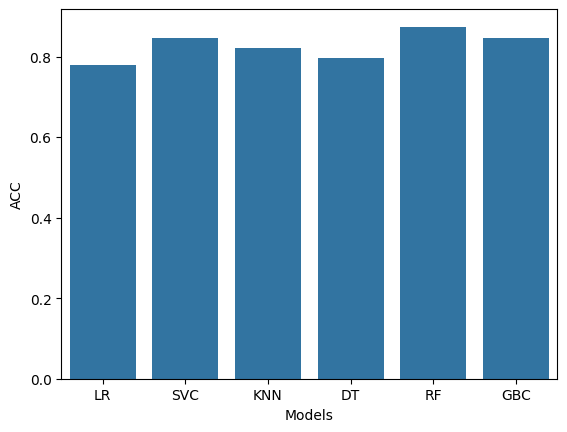

In [79]:
sns.barplot(x=final_data['Models'],y=final_data['ACC'])

In [87]:
final_data = pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','GBC'],'ACC':[precision_score(y_test,y_pred1),precision_score(y_test,y_pred2),precision_score(y_test,y_pred3),precision_score(y_test,y_pred4),precision_score(y_test,y_pred5),precision_score(y_test,y_pred6)]})

In [88]:
final_data

,Models,ACC
0,LR,0.767925
1,SVC,0.840514
2,KNN,0.800858
3,DT,0.780124
4,RF,0.868758
5,GBC,0.841699


<Axes: xlabel='Models', ylabel='ACC'>

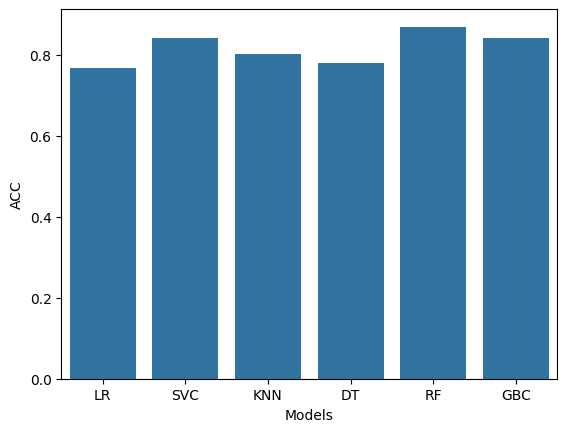

In [89]:
sns.barplot(x=final_data['Models'],y=final_data['ACC'])

In [90]:
#Save the Model

In [91]:
X_res = sc.fit_transform(X_res)

In [92]:
rf.fit(X_res,y_res)

RandomForestClassifier()

In [93]:
import joblib

In [94]:
joblib.dump(rf,'bank_churn_prediction_model')

['bank_churn_prediction_model']

In [95]:
model = joblib.load('bank_churn_prediction_model')

In [96]:
dd.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

In [98]:
model.predict([[619,42,2,0,0,0,0,0,101348.88,0,0]])

array([0], dtype=int64)